In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error

In [2]:
gold = pd.read_csv('Gold_data.csv')
gold

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


In [3]:
gold['date'] = pd.to_datetime(gold['date'])

In [4]:
gold.set_index('date',inplace=True)

In [5]:
gold

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75
...,...
2021-12-17,4394.40
2021-12-18,4389.50
2021-12-19,4389.50


In [66]:
train = gold.head(1500)
test = gold.tail(2182-1500)

In [67]:
train.price

date
2016-01-01    2252.60
2016-01-02    2454.50
2016-01-03    2708.10
2016-01-04    2577.80
2016-01-05    2597.75
               ...   
2020-02-04    3951.90
2020-02-05    4140.00
2020-02-06    4160.60
2020-02-07    4260.90
2020-02-08    4748.00
Name: price, Length: 1500, dtype: float64

In [91]:
hwf_model = ExponentialSmoothing(train['price'],trend='add',seasonal='mul',seasonal_periods=365,damped_trend=False).fit()
hwf_pred = hwf_model.predict(start=test.index[0],end=test.index[-1])
score = MAPE(hwf_pred,test['price'])
print('MAPE score for HOLT WINTERS MODEL is',score)

MAPE score for HOLT WINTERS MODEL is 0.04942431920907056


In [92]:
def plot_forecast(model, start, train, test):
    forecast = pd.DataFrame(hwf_model.forecast(test.shape[0]),index=test.index)
    ax = train.loc[start:].plot(style='--')
    test.plot(ax=ax,figsize=(15,8))
    forecast.plot(ax=ax, style = '-.')
    ax.legend(['orig_train', 'orig_test', 'forecast'])
    
    plt.show()

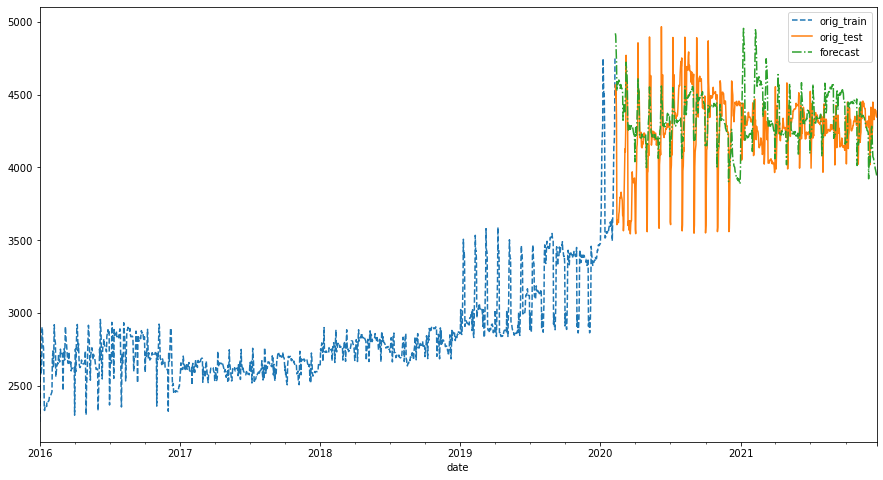

In [93]:
plot_forecast(hwf_model, '2016', train['price'], test['price'])


In [94]:
hwf_model.summary()

Dep. Variable:,price,No. Observations:,1500
Model:,ExponentialSmoothing,SSE,6895614.614
Optimized:,True,AIC,13387.764
Trend:,Additive,BIC,15348.342
Seasonal:,Multiplicative,AICC,13632.466
Seasonal Periods:,365,Date:,"Mon, 19 Sep 2022"
Box-Cox:,False,Time:,19:40:50
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9949995,alpha,True
smoothing_trend,0.0001007,beta,True
